# 論文読解

## Triangular Architecture for Rare Language Translation

Neural Machine Translation（NMT）は、稀少な言語ペア（X、Z）で、Zが稀少であるほど、パフォーマンスが低下する。

この問題を解決するために、情報が豊富な言語Yを導入して翻訳性能を向上させ、バイリンガルデータ（Y、Z）や（X、Y）を活用する新しいトライアングルトレーニングアーキテクチャ（TA-NMT）を提案する。

トライアングルアーキテクチャでは、Zを中間潜在変数とし、Zの並進モデルは、（X、Y）の並進類似度を最大にするという目標の下で、統一双方向EMアルゴリズムと共同で最適化する。

実験の結果、この方法がMultiUNとIWSLT2012データセット上の希少言語の翻訳品質を著しく改善することができた。そして、逆翻訳方法を組み合わせることで、さらに良い性能を出することを実証した。

## 出典元
### 論文
http://aclweb.org/anthology/P18-1006

### 動画
https://vimeo.com/285807823

## 概要

Neural Machine Translation（NMT）は、特にZがまれな言語である場合、低リソース言語ペア（X、Z）ではうまく機能しない。

この問題を解決するために、もう1つの豊富な言語Yを導入することによって、低リソースペアの翻訳パフォーマンスを向上させるために、バイリンガルデータ（Y、Z）（小さい場合もあります）および（X、Y）（豊富な場合があります）を許容する新しいトライアングルトレーニングアーキテクチャ（TA-NMT）を提案する。

このトライアングルアーキテクチャでは、Zが中間潜在変数とみなされ、Zの変換モデルは、（X、Y）の変換尤度を最大にする目的で、統一双方向EMアルゴリズムと共同で最適化される。

実験の結果、この方法がＭｕｌｔｕＮおよびＩＷＳＬＴ２０１２データセット上の希少言語の翻訳品質を著しく改善し、そして逆翻訳方法を組み合わせてさらに良好な性能を達成することを実証した。

## 導入

近年、Neural Machine Translation（NMT）（Kalchbrenner and Blunsom、2013; Sutskever et al。、2014; Bahdanau et al。、2014）は、多くの翻訳作業において驚くべきパフォーマンスを達成している（Jean et al。、2015; Sennrichet et al。 2016; Wuら、2016; Sennrichら、2017）。

これは、エンドツーエンドのアーキテクチャであるため、NMTシステムは最初に入力文を一連の実数ベクトルに符号化し、それに基づいてデコーダは注目メカニズムを用いて単語単位でターゲットシーケンスを生成する（Bahdanauet et al。、2014; Luong et al。、2015）。 

NMTは、トレーニング中、最大尤度推定（ＭＬＥ）法を用いて所与の言語対の翻訳確率を最大化するように最適化されるため、大きなパラメータ空間に適合する大きなバイリンガルデータを必要とする。適切なデータがないと、これは特にまれな言語になると特に、NMTは通常リソースの少ない言語ペアには向いていない（Zoph et al。、2016）。


NMTのデータ希薄性問題に対処するために、単言語データを利用すること（Sennrichetら、2015年; Zhang and Zong、2016年; Chengら、2016年; Zhangら、2018年; Heら、2016年）が最も重要で、一般的な方法である。

単言語データを用いる逆翻訳方法（Ｓｅｎｎｒｉｃｈら、２０１５）は、ターゲット対ソース翻訳モデルを用いて疑似対訳文を生成してソース対ターゲット文を訓練する。逆翻訳を拡張することによって、ソースからターゲットへの変換モデルとターゲットからソースへの変換モデルを共同で訓練し、互いに強化することができる（Chengetら、2016年; Zhangら、2018年）。

共同学習（Chengら、2016年； Zhangら、2018年）と同様に、二重学習（Heら、2016年）は、単言語データをより有効に活用し、2つのモデルを共同で訓練するための強化学習フレームワークを設計する。

本稿では、単言語データ（XまたはZ）を利用して、低リソースのバイリンガルペア（X、Z）を充足させる代わりに、バイリンガルデータ（Y、Z）を追加取得する別の豊富な言語Yを導入することを目指す。（Ｘ、Ｙ）は、（Ｘ、Ｚ）の変換性能を向上させるために利用することができる。特にZがまれな言語であるが、Xがそうでない場合、この要件は満たしやすい。

このシナリオでは、（X、Y）は豊富なリソースのペアとなり、多くのバイリンガルデータを提供できるが、（Y、Z）もZがまれであるため、低リソースペアになる。たとえば、データセットIWSLT2012では、ヘブライ語はまれな言語であるため、「英語 - ヘブライ語」の対訳文ペアは112.6Kしか存在しない。フランス語が第3言語として導入された場合、「フランス語 - ヘブライ語」のもう1つの低リソース対訳データ（116.3K文ペア）、および豊富なリソースの対「英語 - フランス語」の容易に取得される対訳データを得ることができる。

#### 図1：まれな言語翻訳のための三角形アーキテクチャ実線はリッチリソース、破線はローリソースを意味する。 X、Y、Zは3つの異なる言語

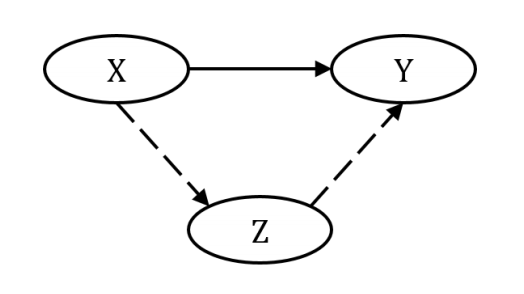

本稿では、導入された豊富な言語Yを用いて、低資源での翻訳性能を得るために、（Y、Z）と（X、Y）の追加バイリンガルデータを利用する新しいトライアングルアーキテクチャ（TA-NMT）を提案する。

このアーキテクチャでは、（X、Z）を使用して（X、Z）の変換モデルをスコアリングし、（X、Y）を使用して（X、Z）を提供する。X→Zを直接モデル化するのではなく、richresourceペア（X、Y）を利用する中で、Zを潜在変数として扱いながら翻訳タスクX→Yをモデル化することから始める。

次に、X⇒Yintを2つのフェーズに分割して、低リソースペアの2つの変換モデル（（X、Z）と（Y、Z））をそれぞれ学習する。第１の変換モデルはＸからＺの隠れた空間内にシーケンスを生成し、それに基づいて第２の変換モデルはＹ内の変換を生成する。

これら２つのモデルは、並進確率ｐ（ｙ ｜ ｘ）を最大化するという目的で期待値最大化（ＥＭ）フレームワークと一緒に最適化することができる。このフレームワークでは、2つのモデルは、他方から得られた重みを使用して、モデル学習用の疑似対訳データを生成することによって、互いに強化できる。Ｘ⇒Ｙの並進方向を逆にすることによって、他の２つの並進モデルｐ（ｚ ｜ ｙ）およびｐ（ｘ ｜ ｚ）を訓練するために使用することができる。

したがって、希少言語Zの4つの並進モデル（p（z | x）、p（x | z）、p（z | y）およびp（y | z））は、提案する統一双方向EMアルゴリズムと一緒に最適化できる。 。

MultiUNおよびIWSLT2012データセットに関する実験結果は、我々の方法がまれな言語の翻訳に対して著しい改善を達成できることを実証している。この方法に逆翻訳（より多くの単言語データを活用する方法）を取り入れることによって、TA-NMTはさらに11の改善を達成することができる。

この方法が貢献できる特徴は以下とおりである。

- EMフレームワークを用いたNMTにおける希少言語のためのデータスパース性問題に効果的に取り組むために新しい三角トレーニングアーキテクチャ（TA-NMT）を提案する。

- この方法は、別の豊富な言語を導入することによって、モデルとデータの両方のレベルで2つの追加のバイリンガルデータセットを活用することができる。

- この方法は統一された双方向ＥＭアルゴリズムであり、そこでは２つの低リソース対上の４つの変換モデルが一緒に訓練されそして互いに促進される。


## 提案手法

図1に示すように、我々の方法は（X、Y）（豊富なリソースのペア）と（Y、Z）を利用して低リソースペア（X、Z）の変換パフォーマンスを改善しようとする。(X、Z）と（Y、Z）は共同で改善することができる。

低資源対の翻訳確率を直接モデル化する代わりに、言語ZをXとYを接続するブリッジとして機能させて、リッチ資源対翻訳X⇒Yをモデル化する。X⇒Yを2つのフェーズに分解して2つの翻訳モデルを構築する。

最初のモデルp（z | x）は、Xの入力文からZの潜在的翻訳を生成し、それに基づいて2番目のモデルp（y | z）が言語Yの最終翻訳を生成する。

標準的なEM手続き（Borman、2004）とJensenの不等式に従って、訓練データD全体に対するp（y | x）の下限を次のように導出する。

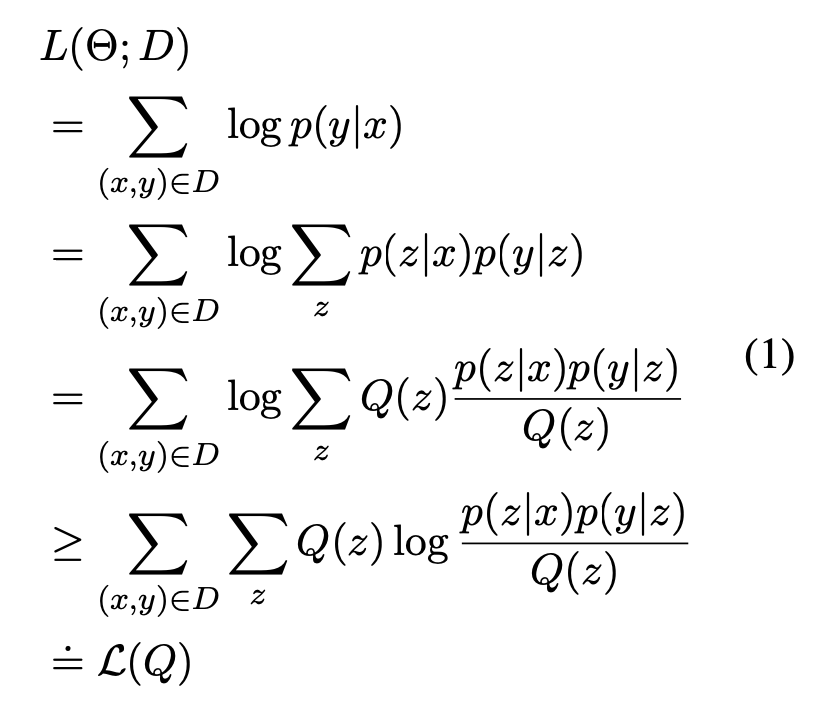

ここで、Θはp（z | x）とp（y | z）のモデルパラメータセット、Q（z）はzの任意の事後分布である。最後の1行の下限をL（Q）と表す。並列文xとyの意味的等価性のため、p（y | x、z）≒p（y | z）という近似式を使用することに注意すること。

以下の小節では、最初に以下に基づいて小節2.1でEM法を提案する。

上記で導出された下限。次に、我々の方法を双方向に広げて、セクション2.2で統一された双方向EMトレーニングを提供する。それから、サブセクション2.3において、我々は疑似コードの形で我々の方法と現在のアルゴリズムのさらなる訓練の詳細を論じていく。

### 2.1 EM Training

Ｌ（θ； Ｄ）を最大にするために、ＥＭアルゴリズムは、その下限のＬ（Ｑ）を最大にするように利用され得る。

Eステップでは、モデルの現在の推定値を使用して変数zの期待値を計算する。つまり、事後分布Q（z）を求める。

Ｍステップにおいて、期待値Ｑ（ｚ）を用いて、我々は下限Ｌ（Ｑ）を最大化する。観測データと現在のモデルを条件として、Q（z）の計算は扱いにくいので、Q（z）= p（z | x）を選択する。Mステップ：Mステップでは、下限Lを最大化する。Q（z）が与えられたモデルパラメータに対して（Q）w（Q）にQ（z）= p（z | x）を代入することによって、以下のようにMステップを得ることができる。

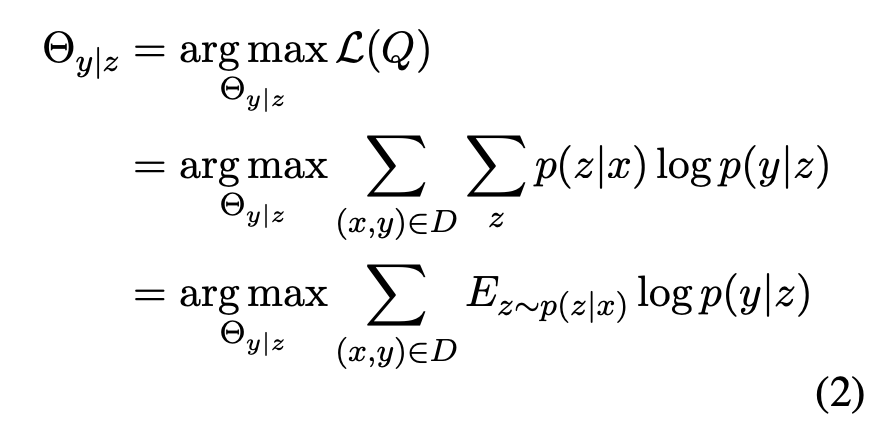


Ｅステップ：Ｑ（ｚ）のおおよその選択は、Ｌ（Ｑ）とＬ（θ； Ｄ）との間のギャップをもたらし、これは一般化ＥＭ方法を用いたＥステップにおいて最小化することができる（ＭｃＬａｃｈｌａｎおよびＫｒｉｓｈｎａｎ、２００７）。 Bishop（2006）によると、これを明示的に次のように書くことができる。


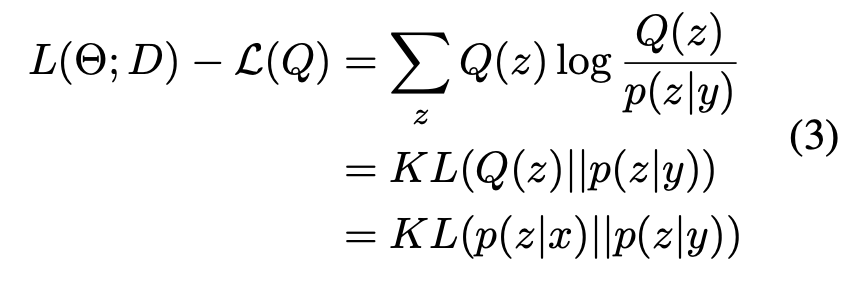

ここで、KL（・）はKullbackLeibler発散であり、p（z | x、y）≈p（z | y）という近似も上で使用される。Eステップでは、L（Q）とL（の間のギャップを最小化する。 Θ； Ｄ）は以下の通りである。

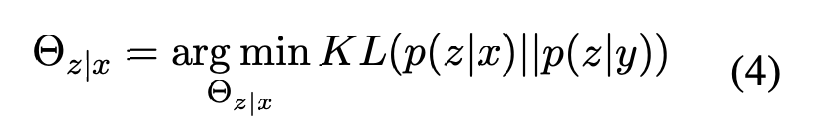


まとめると、EステップはL（Q）とL（Θ; D）の間のギャップを最小化してより良い下限L（Q）を得ることによってモデルp（z | x）を最適化する。

次に、この下限をＭステップで最大化してモデルｐ（ｙ ｜ ｚ）を最適化する。新しいモデルｐ（ｙ ｜ ｚ）が与えられると、Ｅステップはｐ（ｚ ｜ ｘ）を再び最適化して新しい下限を見つけようとし、それによってＭステップが再実行される。

この反復プロセスはモデルが収束するまで継続し、これはＥＭアルゴリズムの収束によって保証される。

### 2.2 Unified Bidirectional Training

モデルｐ（ｚ ｜ ｙ）は、Ｅステップ最適化（式３）におけるｐ（ｚ ｜ ｘ、ｙ）の近似として使用される。言語ペア（Ｙ、Ｚ）の低資源特性により、ｐ（ｚ） | y）よく訓練できない。

この問題を解決するために、逆変換確率p（x | y）を最大化することによって、p（x | z）とp（z | y）を同様に共同で最適化することができる。

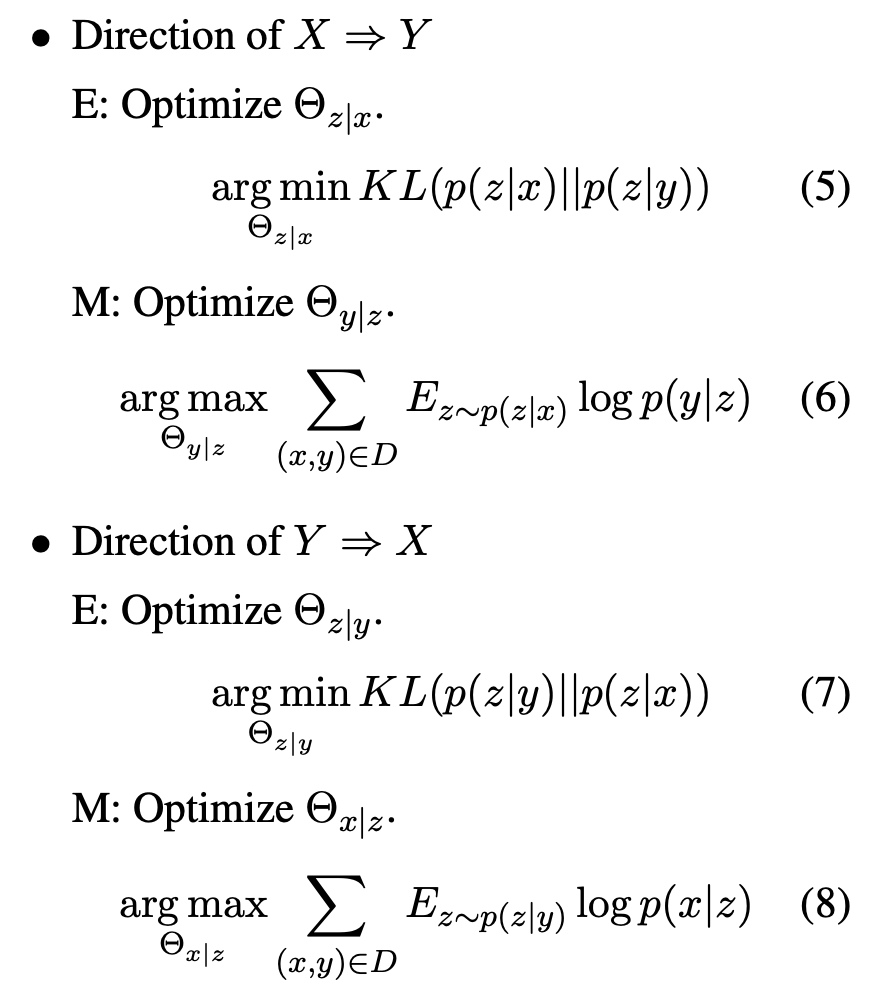

上記の導出に基づいて、本発明者らの方法の全体アーキテクチャは図２に示すことができ、ここでダッシュ矢印はｐ（ｙ ｜ ｘ）の方向を示し、ここでｐ（ｚ ｜ ｘ）およびｐ（ｙ ｜ ｚ）は一緒に訓練される。

一方、実線はｐ（ｘ ｜ ｙ）の方向を示し、ｐ（ｚ ｜ ｙ）とｐ（ｘ ｜ ｚ）はｐ（ｚ ｜ ｙ）の助けを借りて共同で訓練される。

#### 図2：低リソースNMTのためのトライアングル学習アーキテクチャ

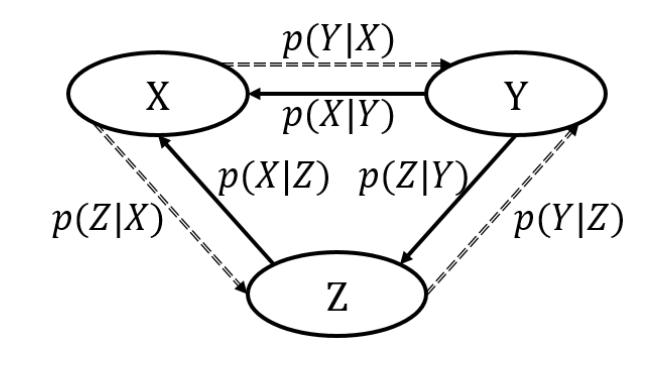

### 2.3 Training Details

我々の統一された双方向トレーニングにおける主要な困難は翻訳候補の指数探索空間であり、それはサンプリング（Ｓｈｅｎら、２０１５年； Ｃｈｅｎｇら、２０１６年）またはモード近似（ＫｉｍおよびＲｕｓｈ、２０１６年）のいずれかによって対処することができる。

我々の実験では、サンプリング方法を利用し、近似のためのトップターゲットセンテンスを単に生成する。

勾配降下トレーニングを実行するために、式５および７のパラメータ勾配は以下のように定式化される。

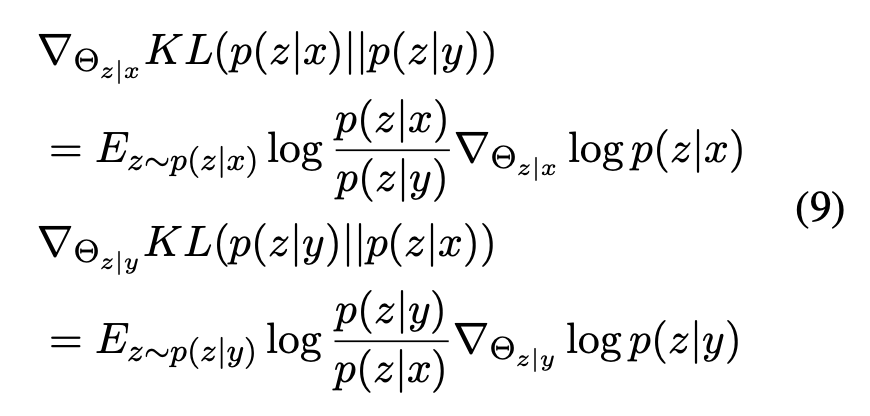

強化学習と同様に、modelsp（z | x）とp（z | y）はモデル自体によって生成されたサンプルを使用して学習される。

我々の観察によると、いくつかのサンプルはノイズが多くトレーニングプロセスにとって有害である。この問題に取り組む1つの方法は、いくつかの追加のメトリック（BLEUなど）を使用して悪いものを除外することである。

それにもかかわらず、我々の設定では、ゴールデンターゲットがないため、トレーニング中にBLEUスコアを計算することはできない（zは、richresourceペア（x、y）からのxまたはyに基づいて生成される）。

したがって、IBMmodel1スコアを選択して、生成された翻訳候補に重みを付ける。与えられたバイリンガルデータ（低リソースペア（x、z）または（y、z））に基づいて単語翻訳確率を計算する。

さらに、トレーニングプロセスを安定させるために、モデルｐ（ｚ ｜ ｘ）またはｐ（ｚ ｜ ｙ）によって生成された擬似サンプルは、１−１の比率で同じミニバッチ内の真のバイリンガルサンプルと混合される。

訓練手順全体は、第５および第９ステップが擬似データを生成している以下のアルゴリズム１に記載されている。

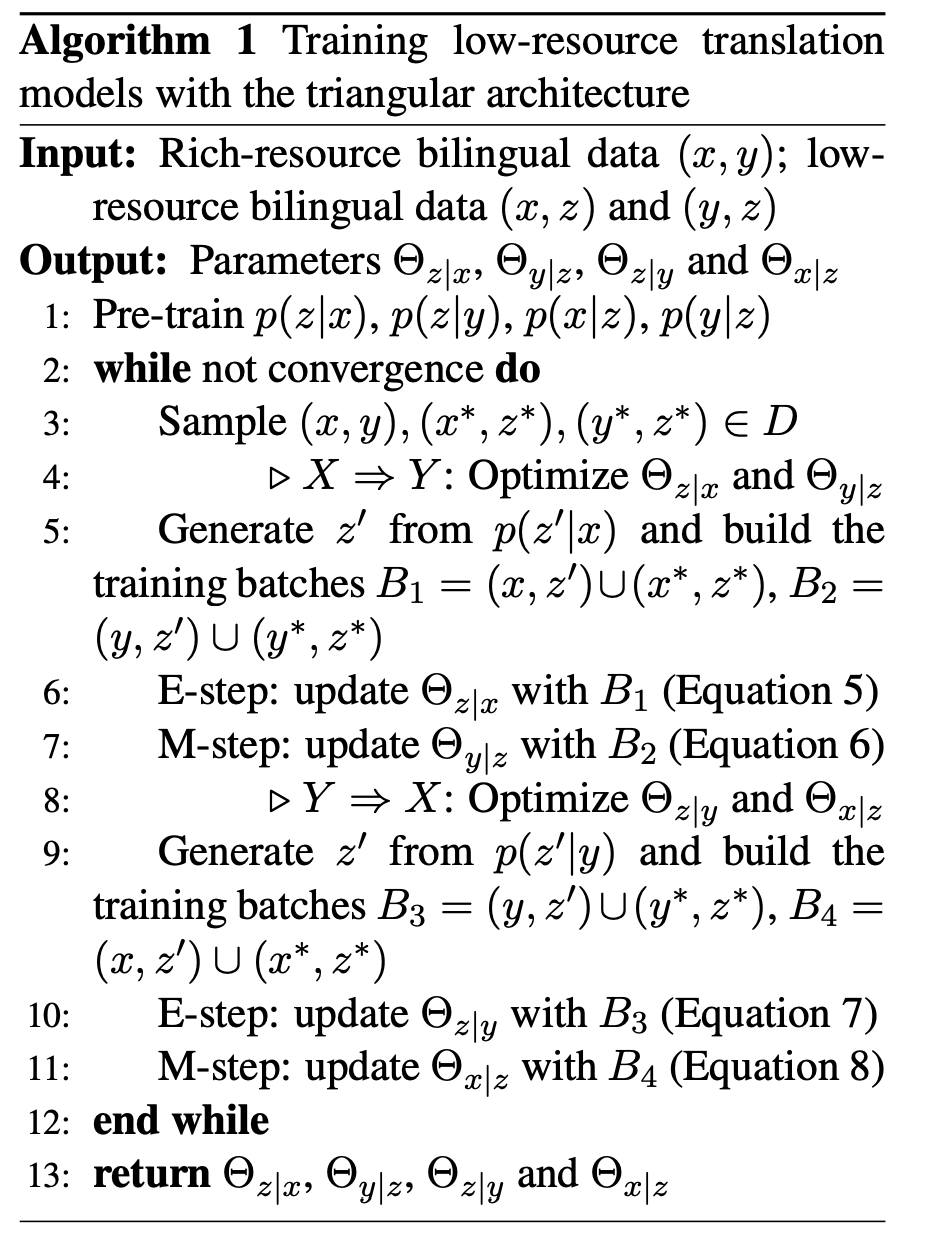



## 実験
### データセット

我々の方法を検証するために、我々は２つの多言語データセットについて実験を行う。

一つは国連からの翻訳された文書のコレクションであるMultiUN（Eisele and Chen、2010）であり、もう一つはTED協議の多言語表記のセットであるIWSLT2012（Cettoloet al。、2012）とする。セクション1で述べたように、我々の方法は、単一言語データを利用する方法と互換性がある。

我々はまた両方のデータセットでまれな言語のいくつかの単言語データを見つけて、我々の方法に逆翻訳を組み込んだ実験を行う。

MultiUN：英語 - フランス語（EN  -  FR）のバイリンガルデータは豊富なリソースの対として使われる。元のデータセットで（X、Z）と（Y、Z）のバイリンガルデータのサブセットをランダムに選択して、低リソースの状況をシミュレートし、重複がないことを確認する。

選択された（X、Z）と（Y、Z）のデータ間のZ。IWSLT20121：英語とフランス語がリッチリソースペア（X、Y）として使用され、2つのまれな言語Zがヘブライ語（HE）とルーマニア語（RO）となる。

https://wit3.fbk.eu/mt.php?release=2012-02-plain

#### 表1：各言語ペアのトレーニングデータサイズ
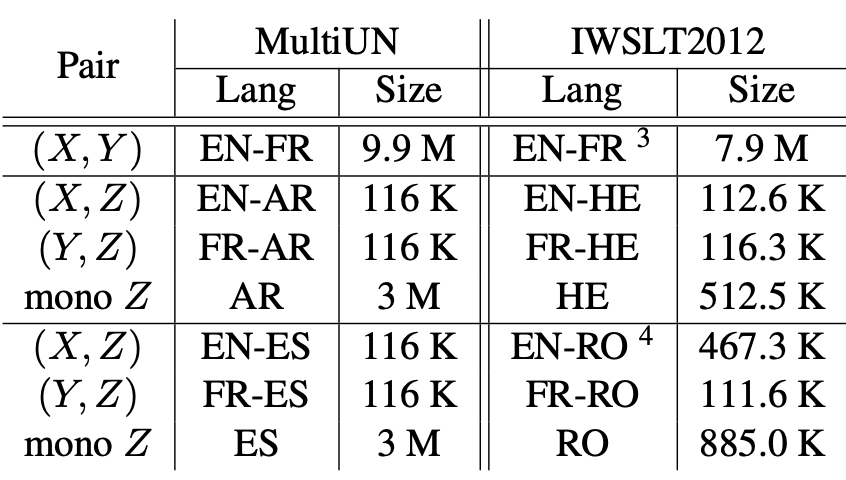

選択。このデータセットでは、低リソースペア（X、Z）と（Y、Z）がZ内で非常に重なり合っている。

さらに、WMT2014データセットの英仏対訳データも、リソースとリソースのペアを充実させるために使用される。

我々はまた、Europarlv7データセットからの追加のEnglishRomanianバイリンガルデータを使用する（Koehn、2005）。 

Zの単言語データ（HEとRO）はweb2から取得される。

両方のデータセットで、すべての文はトークン化後に5から50の長さでフィルタリングされる。

検証およびテストセットは両方とも、トレーニングデータとしての左側を用いて、バイリンガルデータからサンプリングされた２，０００のパラレルセンテンスである。すべての言語ペアのトレーニングデータのサイズは表1に示されている。

#### 表2：さまざまな方法が使用するリソース
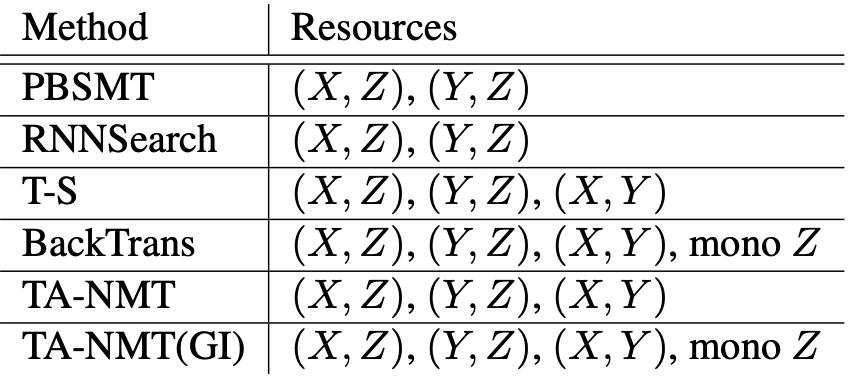

### ベースライン

我々の方法を４つのベースラインシステムと比較する。

最初のベースラインはRNNSearchモデル（Bahdanau et al。、2014）。これは、与えられた小規模のバイリンガルデータで訓練された注意メカニズムを持つシーケンス間シーケンスモデルである。訓練された翻訳モデルは、その後の訓練プロセスのための事前訓練モデルとしても使用される。

2つ目のベースラインは、フレーズベースの統計的機械翻訳システムであるPBSMTである（Koehn et al。、2003）。PBSMTは低リソース言語のペアでうまく機能することが知られているので、我々はそれを我々の提案した方法と比較したい。そして私たちの実験での訓練とテストのためにMoses 5の公的に利用可能な実装を使用する。

3番目のベースラインは教師 - 学生の類似方法である（Chen et al。、2017）。簡潔にするために、T-Sと表記する。プロセスを図3に示す。（X、Z）の並進を改善するために（X、Z）と（X、Y）を利用する方法として考えることもできるので、この方法を第2ベースラインとして扱う。 （Ｚ）ｐ（ｚ ｜ ｘ）およびｐ（ｘ ｜ ｚ）を訓練するとき、ゼロリソースペアおよび教師モデルとしてのｐ（ｘ ｜ ｙ）として使用される。

４番目のベースラインは逆翻訳である（Ｓｅｎｎｒｉｃｈら、２０１５）。これをBackTransと呼ぶ。より具体的には、モデルp（z | x）を訓練するために、表1に示す追加の単言語Zを使用して逆変換を行う。モデルp（x | z）を訓練するために、（X、Y）から取られた単一言語のXを使う。 p（z | y）とp（y | z）を訓練する手順は似ている。この方法は、我々のTA-NMT法と比較してZの特別な単一言語データを使用する。しかし、それを私たちの方法に組み込むことができる。

#### 図3：低リソース翻訳のための教師 - 学生類似の方法p（z | x）とp（x | z）を訓練するために、真の対（y *、z *）∈Dを教師モデルp（x0 | z *）によって生成された擬似対（x0、z *）と混合する。同じミニバッチ。 p（z | y）とp（y | z）の学習手順は似ている。

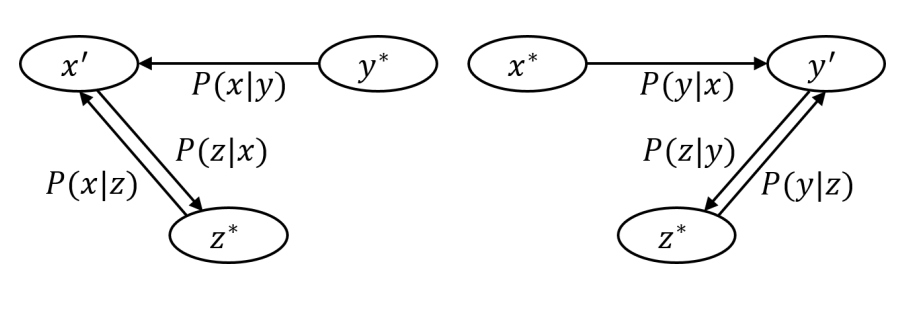

### 実験結果

両方のデータセットに関する実験結果をそれぞれ表3および4に示す。

ここで、RNNSearch、PBSMT、T-S、およびBackTransは4つのベースライン。TA-NMTは我々が提案した方法であり、そしてTA-NMT（GI）は良好な初期化として逆翻訳を組み込んだ我々の方法である。

明快さと公正な比較のために、異なる方法が活用するリソースを表2に示す。MultiUNの表3から、RNNSearchのパフォーマンスは比較的劣っている。予想されるように、PBSMTは低リソースペアでRNNSearchよりも平均1.78 BLEUのパフォーマンスを発揮する。

互いから疑似データを生成することによって（Ｘ、Ｚ）と（Ｙ、Ｚ）の両方のトレーニングデータを２倍にすることができるＴ − Ｓ方法は、ＲＮＮＳｅａｒｃｈに対して平均で最大１．１ＢＬＥＵポイントの改善をもたらす。

Ｔ − Ｓと比較して、我々の方法は、平均して約０．９ＢＬＥＵのさらなる改善を得る。なぜなら、我々の方法は、豊富な資源対（Ｘ、Ｙ）をよりよく活用することができるからである。特大の単言語Zが導入された場合、BackTransは単言語Zなしの方法と比較してp（z | x）とp（z | y）のパフォーマンスを大幅に向上させることができる。

| z）とp（y | z）はどちらのメソッドもrichresourceペア（X、Y）のリソースを利用するためですが、BackTransは提供するアライメント情報を使用しない。さらに、良好な初期化としての逆変換では、BackTransに対して平均して約0.7 BLEUのTA-NMT（GI）によってさらなる改善が達成される。


表4では、同様の結論を引き出すことができる。

ただし、MultiUNとは異なり、IWSLTのEN-FR-HEグループでは、（X、Z）と（Y、Z）がZで重なっている。したがって、RNNSearchではT-Scannotが明らかにパフォーマンスを改善する（約0.2 BLEU）。

それは、教師モデルを介して本質的に二重の訓練データに失敗する。 EN-FR-ROに関しては、FR-ROとROの重なりがないEuroparlv7からの追加導入されたEN-ROデータを用いて、T-SはENFR-HEグループよりも平均性能を改善することができる。

TA-NMTはT-Sよりも平均0.93BLEU優れている。Back Transが追加の単一言語のZを使用していても、改善は前のデータセットほど明確ではないことに注意したい。その理由については次のサブセクションで説明する。

やはり、逆初期化を良好な初期化として用いると、ＴＡ − ＮＭＴ（ＧＩ）が最良の結果を得ることができる。ＴＡ − ＮＭＴのＢＬＥＵスコアは、Ｘ⇒ＺおよびＹ⇒Ｚの方向においてＢａｃｋＴｒａｎｓよりも低いことに留意されたい。その理由は、表2に示すように、これら2つの方法で使用されるリソースが異なるためである。

２方向（例えばＸ⇒ＺとＺ⇒Ｘ）に逆翻訳をするために、我々は両側からの単言語データ（例えばＸとＺ）を必要とするが、ＴＡ − ＮＭＴではＺの単言語データは必要ではない。したがって、X⇒ZまたはY⇒Zの変換では、BackTransはZの追加の単言語データを使用するが、TA-NMTは使用しない。

そのため、BackTransはこれらの方向でTA-NMTよりも優れている。

私たちの方法は、良い初期化としてTA-NMT（GI）として逆翻訳を活用することができ、すべての翻訳方向でBackTransよりも優れている。

各データグループの異なる方法の平均テストBLEUスコア（EN-FR-AR、EN-FRES、EN-）明確な比較のために、表の列ＡｖｅにＦＲ − ＨＥ、およびＥＮ − ＦＲ − ＲＯ）が記載されている。
